In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

path = untar_data(URLs.MNIST); path

PosixPath('/home/ec2-user/.fastai/data/mnist_png')

In [2]:
path.ls()

[PosixPath('/home/ec2-user/.fastai/data/mnist_png/testing'),
 PosixPath('/home/ec2-user/.fastai/data/mnist_png/models'),
 PosixPath('/home/ec2-user/.fastai/data/mnist_png/training')]

In [3]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train='training', valid_pct=0.2, ds_tfms=tfms, size=26).normalize(imagenet_stats)

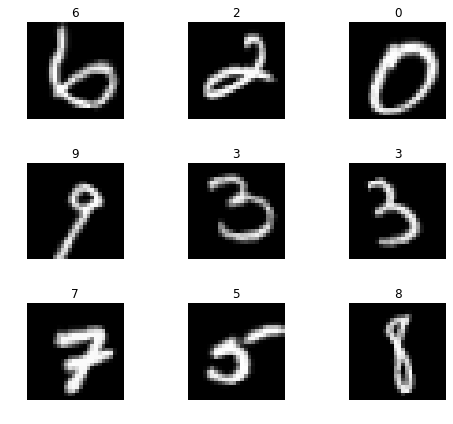

In [4]:
data.show_batch(rows=3, figsize=(7,6))

In [5]:
print(data.classes)
len(data.classes),data.c

print(F"Training dataset includes {len(data.train_ds)} images.")
print(F"Validation dataset includes {len(data.valid_ds)} images.")

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Training dataset includes 56000 images.
Validation dataset includes 14000 images.


In [6]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
%time learn.fit_one_cycle(9)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/ec2-user/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 19.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.993687,0.599087,0.191286,01:10
1,0.459436,0.265796,0.081643,01:05
2,0.256059,0.132073,0.041071,01:05
3,0.168686,0.083769,0.024500,01:05
4,0.148916,0.063096,0.019786,01:05
5,0.130583,0.053888,0.016214,01:06
6,0.115090,0.049754,0.015000,01:05
7,0.100255,0.046610,0.014571,01:04
8,0.099976,0.046969,0.014857,01:05


CPU times: user 9min 15s, sys: 28.3 s, total: 9min 43s
Wall time: 9min 54s


In [7]:
learn.save('stage-1')

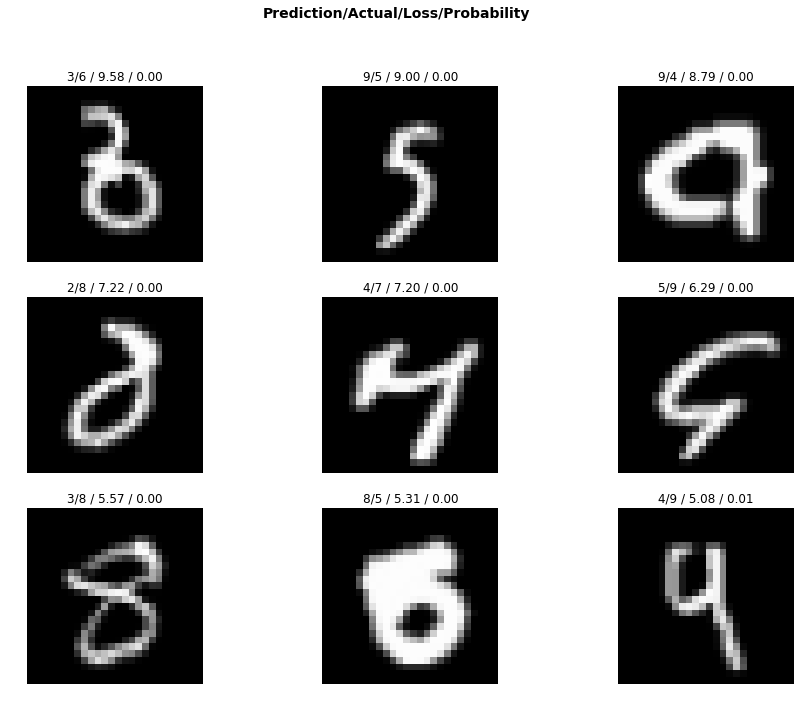

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

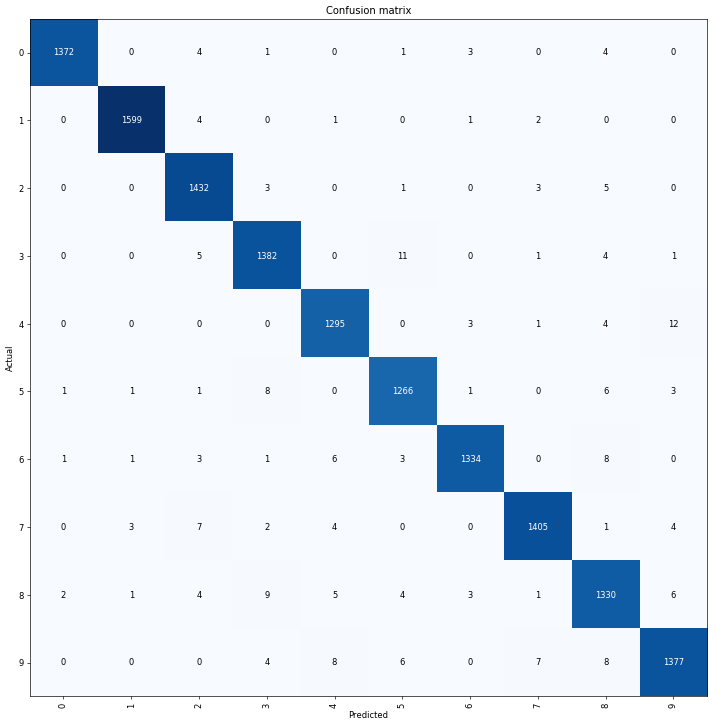

In [9]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)